# Question 4 : (14 total points) Evaluating Binary Classifiers
**In this question we will perform performance evaluation of binary classifiers.**
You have been tasked with evaluating the performance of four different binary classification algorithms, `alg_1, alg_2, alg_3, and alg_4`. Unfortunately, you do not have access to the models themselves, only their predictions on a held-out test set. Your goal is to evaluate how well the different models perform at predicting the ground truth class labels `gt` for this test set.
The dataset is contained in classification_eval_1.csv. You should load it into a Pandas DataFrame using pandas.read_csv().

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
%matplotlib inline

/Users/davemalvin/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'classification_eval_1.csv')
dset = pd.read_csv(data_path, delimiter = ',')

In [3]:
dset.head(5)

,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.051302,0.000000,0.821882,0.705028
1,0,0.695441,1.000000,1.000000,0.741789
2,1,0.471121,0.913034,0.000000,1.000000
3,1,1.000000,1.000000,0.000000,1.000000
4,0,0.857339,0.000000,0.296797,0.809736


In [4]:
dset.describe()

,gt,alg_1,alg_2,alg_3,alg_4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.202000,0.493739,0.518386,0.491591,0.743101
std,0.401693,0.383203,0.426419,0.304036,0.194130
min,0.000000,0.000000,0.000000,0.000000,0.167336
25%,0.000000,0.074081,0.000000,0.248341,0.597597
50%,0.000000,0.498969,0.549211,0.476655,0.760082
75%,0.000000,0.887967,1.000000,0.732685,0.919085
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
gt       1000 non-null int64
alg_1    1000 non-null float64
alg_2    1000 non-null float64
alg_3    1000 non-null float64
alg_4    1000 non-null float64
dtypes: float64(4), int64(1)
memory usage: 39.1 KB


# (a) (4 points) Report the classification accuracy (in %) for each of the four different models using the `gt` attribute as the ground truth class labels. Use a threshold of >= 0.5 to convert the continuous classifier outputs into binary predictions. 
Which model is the best according to this metric? What, if any, are the limitations of the above method for computing accuracy and how would you improve it without changing the metric used?

In [6]:
# Convert the continuous classifier outputs into binary predictions
dset_binary = dset.copy(deep=True)
dset_binary[dset_binary >= 0.5] = 1
dset_binary[dset_binary < 0.5] = 0
dset_binary.head(5)

,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.0,0.0,1.0,1.0
1,0,1.0,1.0,1.0,1.0
2,1,0.0,1.0,0.0,1.0
3,1,1.0,1.0,0.0,1.0
4,0,1.0,0.0,0.0,1.0


In [7]:
# Try for alg_1
alg_1 = dset_binary.iloc[:,1:2].values
actual = dset_binary.iloc[:,0:1].values
acc = accuracy_score(actual,alg_1)

actual = dset_binary.iloc[:,0:1].values
for i in range(1,5):
    alg_i = dset_binary.iloc[:,i:i+1].values
    acc = accuracy_score(actual,alg_i) * 100
    print("Accuracy for alg_{} = {}%".format(i,acc))

Accuracy for alg_1 = 61.6%
Accuracy for alg_2 = 55.00000000000001%
Accuracy for alg_3 = 32.1%
Accuracy for alg_4 = 32.9%


According to this metric, alg_1 gives the best accuracy. 

# (b) (4 points) Instead of using classification accuracy, report the Area Under the ROC Curve (AUC) for each model. Does the model with the best AUC also have the best accuracy? If not, why not?
Hint: You can use the `roc_auc_score` function from sklearn.

In [8]:
for i in range(1,5):
    alg_i = dset.iloc[:,i:i+1].values
    area = roc_auc_score(actual,alg_i)
    print("Area under ROC curve for alg_{} = {}".format(i,area))

Area under ROC curve for alg_1 = 0.7320932281198045
Area under ROC curve for alg_2 = 0.6316285763914737
Area under ROC curve for alg_3 = 0.06395009801732053
Area under ROC curve for alg_4 = 0.8473876522990644


No, the model with the best AUC is alg_4 but the model with the best accuracy is alg_1.

# (c) (6 points) Plot ROC curves for each of the four models on the same plot. Comment on the ROC curve for `alg_3`? Is there anything that can be done to improve the performance of `alg_3` without having to retrain the model?
Hint: You can use the `roc_curve` function from sklearn.

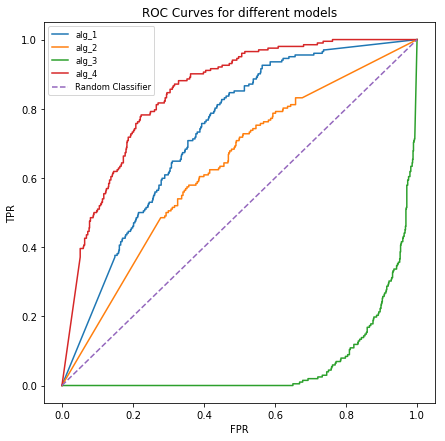

In [9]:
noOfColumns = dset.shape[1]
plt.figure(figsize=(7,7))
for i in range(1,noOfColumns):
    alg_i = dset.iloc[:,i:i+1].values
    fpr, tpr, _ = roc_curve(actual,alg_i)
    plt.plot(fpr,tpr)
    
plt.plot(fpr, fpr, linestyle='--') # Performance of a andom classifier
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curves for different models')
plt.legend(['alg_1','alg_2','alg_3','alg_4', 'Random Classifier'], loc='upper left', fontsize='small')
plt.show()